# **Title: Week Eight - Assignment High Frequency Words**

---

**Submitted by:** Umais Siddiqui, Banu Boopalan

**Date:** March 24th, 2025

**Course:** Data Science – DATA620

**Video Link:**

**Github Repository:** https://github.com/umais/DATA620/blob/master/week8/Assignment_Week8.ipynb

In this assignment we will be doing the following.

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

#**STEP 1 Getting the Corpus from Wikipedia**

So for the purposes of getting a text corpus we used the wikipedia api to get the data for the topic "Psychology" once we retrieved the article we can now get the text for the article and begin analyzing the words.

In [11]:
# Install necessary libraries if you haven't already
!pip install wordcloud matplotlib nltk wikipedia-api

import requests
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import wikipediaapi
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Download the NLTK stopwords if you don't have them yet
nltk.download('stopwords')

wiki_wiki = wikipediaapi.Wikipedia(user_agent="DataScienceProject/1.0", language='en')
# Wikipedia API URL
topic = "Psychology"
page = wiki_wiki.page(topic)
content=page.text







[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#**STEP 2: Unique Words in the "Psychology" Corpus**

In the context of analyzing a Wikipedia article on Psychology, unique words are defined as the distinct terms that appear in the text, excluding common, non-meaningful words known as stop words (e.g., "the", "a", "and"). These words are considered "unique" because they provide significant meaning and contribute to the understanding of the content, rather than serving as grammatical tools.




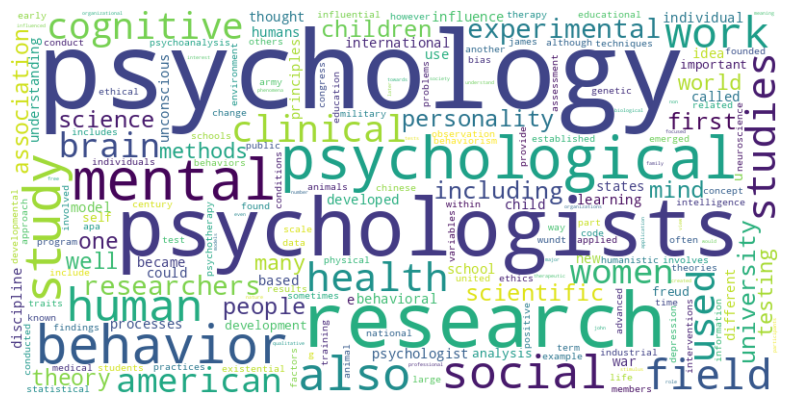

In [22]:
from IPython.display import display, HTML




# Load the list of stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Clean and tokenize the text, converting it to lowercase
words = re.findall(r'\b\w+\b', content.lower())

# Filter out stop words from the list
filtered_words = [word for word in words if word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_words)

# Generate word cloud


# Output the results
unique_words = len(word_counts)
# Print the result in large font using HTML
display(HTML(f"<h1 style=color:red>Total unique words (excluding stop words): {unique_words}</h1>"))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()


#**STEP 3: Number of Unique Words representing half of the corpus**




In [23]:
# Find minimum unique words covering half the corpus
total_words = sum(word_counts.values())
half_words = total_words / 2
sorted_word_counts = word_counts.most_common()
cumulative_count = 0
num_unique_half = 0
for word, count in sorted_word_counts:
    cumulative_count += count
    num_unique_half += 1
    if cumulative_count >= half_words:
        break


display(HTML(f"<h1 style=color:red>Number of unique words that represent half the corpus (excluding stop words): {num_unique_half}</h1>"))


#**STEP 4: Top 20 Highest Frequency Words**

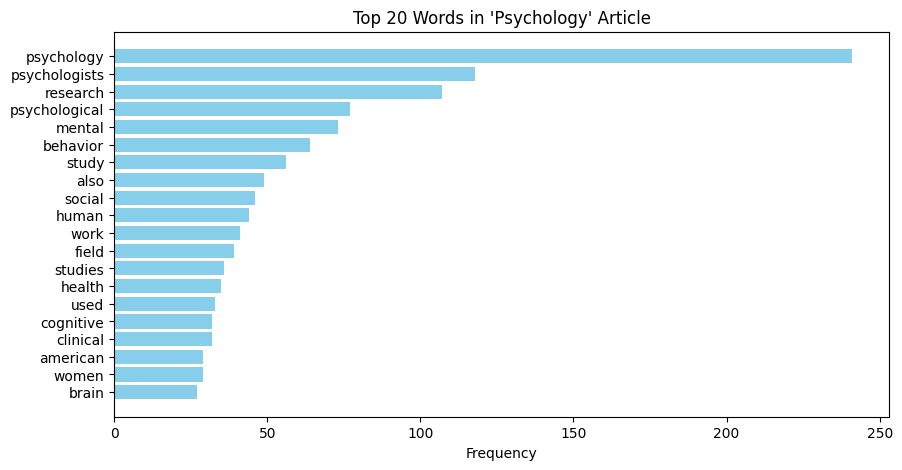

In [27]:



# Get the top N most common words
top_n_words = sorted_word_counts[:20]  # Adjust N as needed
words, counts = zip(*top_n_words)  # Unzip the word and count

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.title(f"Top 20 Words in '{topic}' Article")
plt.gca().invert_yaxis()  # To display the highest frequency at the top
plt.show()






#**STEP5:  Top 200 Words Relative Frequency Graph**

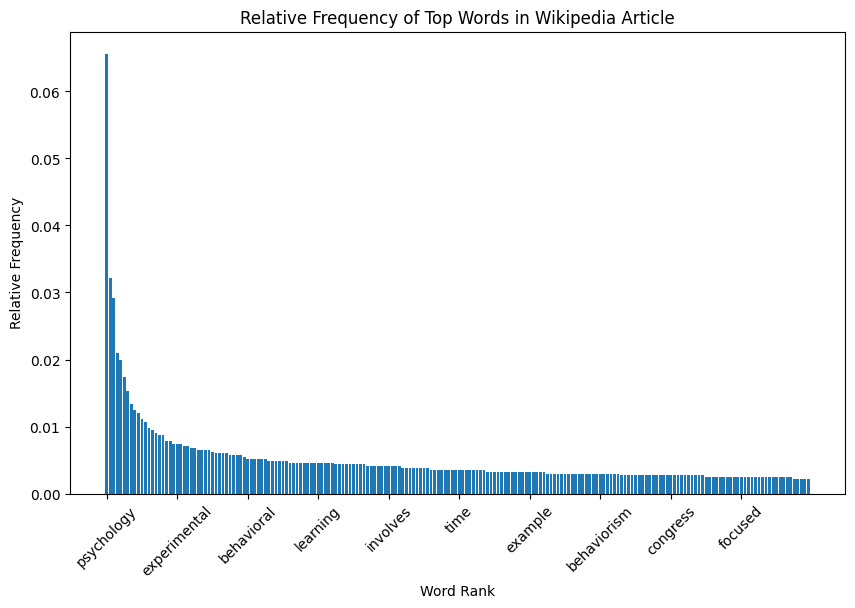

#,Word,Count
1,psychology,241
2,psychologists,118
3,research,107
4,psychological,77
5,mental,73
6,behavior,64
7,study,56
8,also,49
9,social,46
10,human,44


In [38]:

# Adjust if fewer than 200 words exist
top_n = min(200, len(sorted_word_counts))
top_words = sorted_word_counts[:top_n]



# Plot relative frequency of top words
words, counts = zip(*top_words)
relative_frequencies = np.array(counts) / sum(counts)

# Create the plot and display it inline in the same Jupyter cell
plt.figure(figsize=(10, 6))
plt.bar(range(1, top_n + 1), relative_frequencies)
plt.xticks(range(1, top_n + 1, max(1, top_n // 10)), words[::max(1, top_n // 10)], rotation=45)
plt.xlabel("Word Rank")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequency of Top Words in Wikipedia Article")

# Display the chart next to the table
plt.show()

# Generate HTML table with Serial Number, Word, and Count
html_table = """
<h1 style="font-weight:bold;">Top 200 Words</h1>
<div style="display: flex; justify-content: space-between; align-items: flex-start;">
    <div style="width: 48%; padding-right: 2%;">
        <table style="width:100%; border:1px solid black; border-collapse: collapse; text-align: left;">
          <tr>
            <th style="padding: 8px; border: 1px solid black; background-color: #f2f2f2;">#</th>
            <th style="padding: 8px; border: 1px solid black; background-color: #f2f2f2;">Word</th>
            <th style="padding: 8px; border: 1px solid black; background-color: #f2f2f2;">Count</th>
          </tr>
"""

# Loop through the top words and add them to the table with serial number
for idx, (word, count) in enumerate(top_words, start=1):  # Show top 10 words
    html_table += f"""
    <tr>
      <td style="padding: 8px; border: 1px solid black;">{idx}</td>
      <td style="padding: 8px; border: 1px solid black;">{word}</td>
      <td style="padding: 8px; border: 1px solid black;">{count}</td>
    </tr>
    """

html_table += """
        </table>
    </div>
    <div style="width: 48%; display: flex; justify-content: center;">
"""

# Display the HTML table
display(HTML(html_table))


# **STEP 6: Check Zipf's Law**

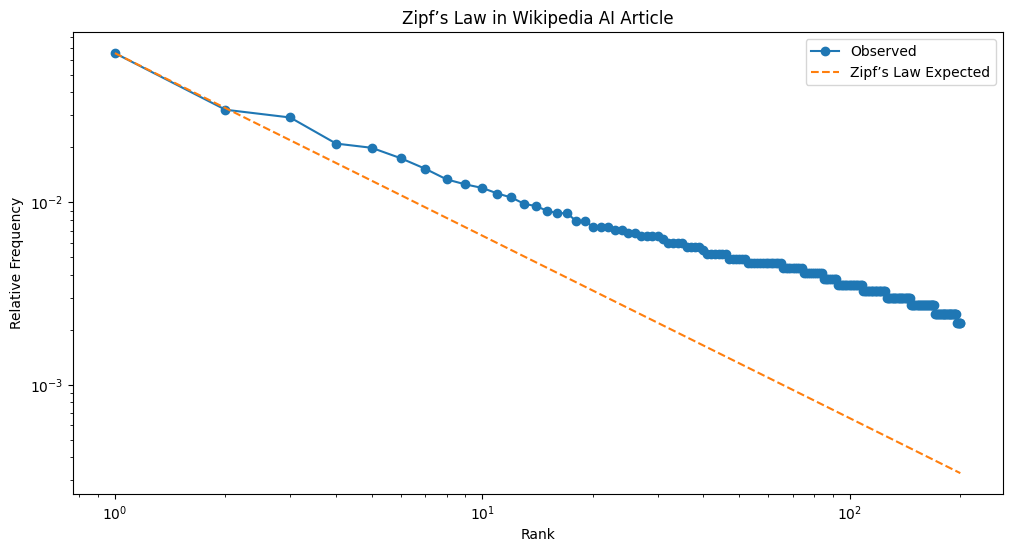

In [39]:
# Check Zipf’s law
ranks = np.arange(1, top_n + 1)
zipf_expected = relative_frequencies[0] / ranks
plt.figure(figsize=(12, 6))
plt.loglog(ranks, relative_frequencies, label="Observed", marker="o")
plt.loglog(ranks, zipf_expected, label="Zipf’s Law Expected", linestyle="--")
plt.xlabel("Rank")
plt.ylabel("Relative Frequency")
plt.title("Zipf’s Law in Wikipedia AI Article")
plt.legend()
plt.show()


#**STEP 7: Observation**

The general trend of the blue line (observed data) aligns with the expected distribution predicted by Zipf’s Law (orange dashed line).

##**Explanation:**

Zipf’s Law states that word frequencies in natural language typically follow a power law distribution: the most frequent word occurs approximately twice as often as the second most frequent, three times as often as the third, and so on. This pattern can be seen in the observed data, especially in the higher-ranked words (left side of the plot).

##**Zipf's Law Applicability to the corpus:**

The text follows the expected distribution pattern, demonstrating the general applicability of Zipf’s Law to the word frequency distribution in natural language texts.

**Deviation in Lower-Ranked Words:**

**Observation:**

As you move toward the lower-ranked words (right side of the plot), the observed data starts to deviate from the expected trend.

**Explanation:**

This deviation could be due to a variety of factors:

**Limited Vocabulary:**

The text might contain a limited or specialized vocabulary, causing lower-ranked words to have less frequency than predicted.

**Contextual Use:**

Some words may not occur as frequently because the text is more focused on a specific topic (in this case, Psychology). Such words may not follow the standard distribution expected by Zipf's Law, especially in shorter texts or domain-specific writing.

**Real-World Data Variability:**

Real-world texts often exhibit irregularities or noise that deviate from idealized models like Zipf’s Law, particularly for words that occur infrequently (low ranks).

**Final Thoughts**

 While Zipf's Law provides a good approximation of word frequency distributions, real texts, particularly domain-specific or shorter ones, may exhibit deviations due to context, vocabulary size, or other linguistic factors.

#**Step 8: How does this corpus differ from “all words in all corpora.”**


##**1. Specialized Vocabulary (Psychology Terms):**

**Psychology-Specific Terms:**

 Words like "cognition," "behavior," "perception," "emotion," and other terms specific to psychology are likely to appear frequently in this corpus. These terms are highly specialized and would not be as common in a general corpus.

**Comparison:**

In "all corpora," such psychology-specific words would have a much lower frequency because general corpora include texts from diverse fields, not just psychology.

##**2. Lower Diversity of Word Usage:**

**Psychology-Focused Vocabulary:**

The range of vocabulary in this psychology corpus is narrower compared to general corpora that cover a wide range of subjects. The thematic focus on psychology limits the diversity of word usage.

**Effect:**

In general corpora, the inclusion of many different topics (e.g., history, science, sports, entertainment) introduces a broader range of vocabulary, increasing the diversity of word usage.

##**3. Overrepresentation of Psychological Jargon:**

**Frequent Use of Psychological Terms:**

Words like "therapy," "mental," "disorder," "stress," and other related terms will appear more frequently in this corpus. These words are essential for discussing psychological concepts and would be repeated often.

**Effect on Zipf’s Law:**

The high frequency of these specialized psychology terms may cause the word frequency distribution to deviate from the general pattern predicted by Zipf’s Law. In a general corpus, these terms would be less frequent, and other domain-specific terms from different fields would dilute their prominence.

##**4. Common Function Words Still Present:**

**Function Words:**

Words like "the," "is," "and" will still dominate in this psychology corpus, as they do in any English text. However, because the text is focused on psychology, there may be slightly more technical terms than in a broader corpus, reducing the relative frequency of these common words.

**Comparison:**

In a general corpus, these function words are even more dominant, since they are essential in all topics and contexts.

##**5. Lower Variety of Topics:**

Thematic Focus on Psychology: Since this corpus revolves around psychology, the diversity of themes is limited. The vocabulary will reflect the focus on mental processes, behavior, and related topics, reducing the presence of words related to other fields like sports, technology, or finance.

Effect: A general corpus would feature a wider variety of words from many different fields, increasing the number of low-frequency words and expanding the overall word variety.

## **6. Repetition of Key Terms:**
Frequent Reuse of Key Psychology Concepts: Words related to core psychological concepts (e.g., "memory," "development," "cognition") will be repeated more frequently, especially in an academic or educational text. This could increase the frequency of these words beyond what is predicted by Zipf’s Law.

Comparison: In general corpora, there is less repetition of key concepts from any one field, leading to a broader distribution of word frequencies.

##**7. Absence of Informal Language:**

Formal Tone of Psychology Texts: If this psychology text is academic or formal, it is likely devoid of slang, contractions, or conversational language. This contrasts with general corpora, which may include informal texts (e.g., social media, dialogues, fiction).

Effect: The psychology corpus will have a more formal and technical vocabulary, whereas "all corpora" would include a broader mix of formal and informal language.

##**8. Proper Nouns Related to Psychology:**

Frequent Appearance of Psychology-Related Names: Proper nouns like names of influential psychologists (e.g., Freud, Pavlov, Skinner) or psychological theories (e.g., "Psychoanalysis," "Behaviorism") are more frequent in this psychology corpus.

Comparison: In a general corpus, these names would appear far less frequently, and there would be more proper nouns from various other fields (e.g., historical figures, political entities, companies).

#**Conclusion:**

The psychology corpus differs from "all words in all corpora" primarily because:

- It contains a higher frequency of specialized psychological terms.

- It has a narrower range of topics and vocabulary.

- It may exhibit more frequent repetition of key psychological concepts.

- It uses fewer informal or conversational words compared to a general corpus.

These factors make the word frequency distribution in the psychology corpus different from what is typically observed in more diverse corpora, which cover a broader range of topics and language registers.